In [7]:
import pandas as pd
from google.colab import files

# Assuming the uploaded file name is 'online_gaming.csv' and it's a CSV file
# Use pd.read_csv to read it:
df = pd.read_csv('online_gaming.csv')#este dataset se tomó de Kaggle

# Display the first few rows of the DataFrame
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [8]:
import numpy as np

def least_squares_regression(x, y):
    """
    Performs least squares regression to find the line of best fit.

    Args:
        x (numpy.ndarray): The independent variable data.
        y (numpy.ndarray): The dependent variable data.

    Returns:
        tuple: A tuple containing the slope (m) and y-intercept (b) of the
               regression line.
    """

    # Calculate the means of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculate the numerator and denominator for the slope (m)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)

    # Calculate the slope (m) and y-intercept (b)
    m = numerator / denominator
    b = y_mean - (m * x_mean)

    return m, b

# Example usage:
x = np.array([1, 2, 3, 4, 5])  # Independent variable data
y = np.array([2, 3, 5, 6, 5])  # Dependent variable data

# Perform least squares regression
slope, intercept = least_squares_regression(x, y)

# Print the results
print("Slope (m):", slope)#pendiente
print("Y-intercept (b):", intercept)

# You can now use the slope and intercept to predict values:
# predicted_y = slope * x + intercept

Slope (m): 0.9
Y-intercept (b): 1.5


In [9]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

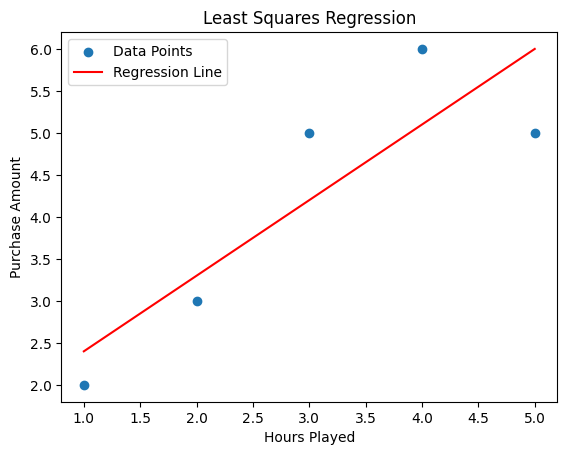

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame as 'df'

# ... (least_squares_regression function and data extraction remain the same) ...

# Perform least squares regression
slope, intercept = least_squares_regression(x, y)

# ... (print results) ...

# Plotting the data and regression line
plt.scatter(x, y, label='Data Points')  # Scatter plot of the data points
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')  # Plot the regression line

plt.xlabel('Hours Played')  # Set x-axis label
plt.ylabel('Purchase Amount')  # Set y-axis label
plt.title('Least Squares Regression')  # Set plot title
plt.legend()  # Show legend
plt.show()  # Display the plot

In [11]:
print(df.head())  # Ver las primeras filas del DataFrame
print(df.columns)  # Ver los nombres exactos de las columnas


   PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                   

In [12]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv('/content/online_gaming.csv')

# Convertir columnas categóricas a variables numéricas con One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel'])

# Mostrar las primeras filas del DataFrame codificado
print(df_encoded.head())


   PlayerID  Age  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
0      9000   43      16.271119                0                6   
1      9001   29       5.525961                0                5   
2      9002   22       8.223755                0               16   
3      9003   35       5.265351                1                9   
4      9004   33      15.531945                0                2   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                        108           79                    25   
1                        144           11                    10   
2                        142           35                    41   
3                         85           57                    47   
4                        131           95                    37   

   Gender_Female  Gender_Male  ...  GameGenre_RPG  GameGenre_Simulation  \
0          False         True  ...          False                 False   
1           True        False  .

In [13]:

# Usar 'PlayTimeHours' como la variable objetivo
X = df_encoded.drop('PlayTimeHours', axis=1)  # Eliminar la columna objetivo de las características
y = df_encoded['PlayTimeHours']  # Esta es la variable objetivo




**Hacer una matriz de correlacion para verificar la informacion de gemnini y completar el EDA con graficas (Ppalmentedistribucion de cada columna y grafica que muestren la relacion entre dos variables)**

In [14]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train.head()



,PlayTimeHours
15851,22.797054
38470,3.423246
11469,2.044750
6713,21.349632
14054,15.118617


In [15]:
# 1. Regresión Lineal (Mínimos Cuadrados)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
y_pred_linear



array([12.04634201, 12.08772732, 12.38447618, ..., 11.90828214,
       11.908651  , 12.00788681])

In [20]:
from sklearn.metrics import r2_score

# Assuming you have your true values in 'y_test' and predicted values in 'y_pred_linear'
r2 = r2_score(y_test, y_pred_linear)

print("R-squared:", r2)

R-squared: -0.0010268110885154336


In [16]:
# 2. Calcular los errores (residuos)
errores = y_test - y_pred_linear
errores



,PlayTimeHours
34667,-8.719431
22227,7.538735
24899,10.937610
35415,-2.009847
21440,-5.466160
...,...
26873,7.057144
24797,4.195133
24023,-6.248877
38472,-5.960884


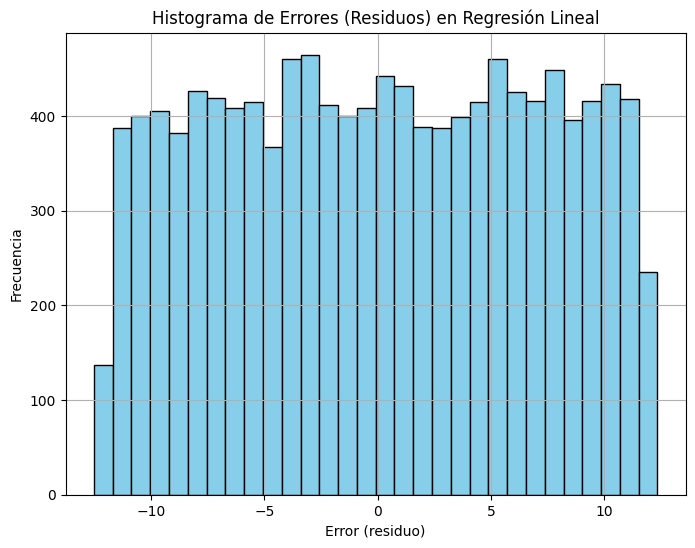

In [17]:
# 3. Generar el histograma de los errores
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=30, edgecolor='black', color='skyblue')
plt.title('Histograma de Errores (Residuos) en Regresión Lineal')
plt.xlabel('Error (residuo)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [18]:
import numpy as np

def least_squares_regression(X, y):
    """
    Realiza una regresión de mínimos cuadrados para encontrar la recta de mejor ajuste.

    Args:
        X (numpy.ndarray): Datos de la variable independiente.
        y (numpy.ndarray): Datos de la variable dependiente.

    Returns:
        tuple: Una tupla que contiene la pendiente (m) y la intersección con el eje Y (b)
               de la línea de regresión.
    """

    # Calcular los promedios de X y y
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    # Calcular el numerador y denominador para la pendiente (m)
    numerator = np.sum((X - X_mean) * (y - y_mean))
    denominator = np.sum((X - X_mean)**2)

    # Calcular la pendiente (m) y la intersección (b)
    m = numerator / denominator
    b = y_mean - (m * X_mean)

    return m, b

# Usar los datos del entrenamiento (X_train y y_train)
X_train = X_train['Age'].values  # Tomemos 'Age' como ejemplo de variable independiente
y_train = y_train.values  # 'PlayTimeHours' como variable dependiente

# Aplicar la regresión de mínimos cuadrados
slope, intercept = least_squares_regression(X_train, y_train)

# Imprimir los resultados
print("Slope (m):", slope)  # pendiente
print("Y-intercept (b):", intercept)

# Puedes predecir valores usando la ecuación de la recta de regresión:
# predicted_y = slope * X_train + intercept


Slope (m): -0.0003550529329228434
Y-intercept (b): 12.004720166225814


Slope (m): -0.10470125719445113
Y-intercept (b): 12.04539506830016


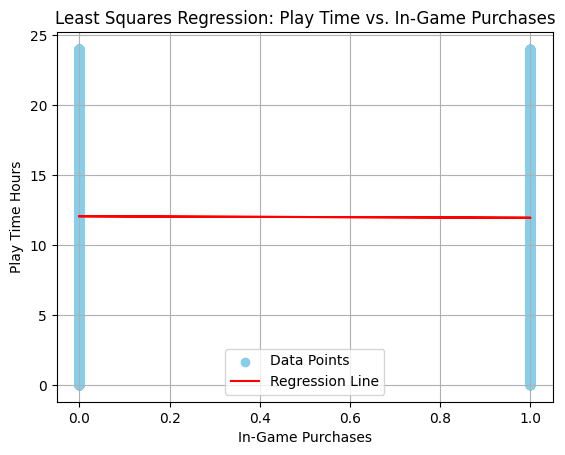

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv('/content/online_gaming.csv')

# Extraer la variable independiente (InGamePurchases) y la dependiente (PlayTimeHours)
x = df['InGamePurchases'].values  # Variable independiente
y = df['PlayTimeHours'].values  # Variable dependiente

def least_squares_regression(x, y):
    """
    Realiza una regresión de mínimos cuadrados para encontrar la recta de mejor ajuste.

    Args:
        x (numpy.ndarray): Datos de la variable independiente.
        y (numpy.ndarray): Datos de la variable dependiente.

    Returns:
        tuple: Una tupla que contiene la pendiente (m) y la intersección con el eje Y (b)
               de la línea de regresión.
    """

    # Calcular los promedios de x y y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calcular el numerador y denominador para la pendiente (m)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)

    # Calcular la pendiente (m) y la intersección (b)
    m = numerator / denominator
    b = y_mean - (m * x_mean)

    return m, b

# Realizar la regresión de mínimos cuadrados
slope, intercept = least_squares_regression(x, y)

# Imprimir los resultados
print("Slope (m):", slope)  # pendiente
print("Y-intercept (b):", intercept)

# Trazar los datos y la línea de regresión
plt.scatter(x, y, label='Data Points', color='skyblue')  # Gráfico de dispersión de los puntos de datos
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')  # Trazar la línea de regresión

plt.xlabel('In-Game Purchases')  # Etiqueta del eje x
plt.ylabel('Play Time Hours')  # Etiqueta del eje y
plt.title('Least Squares Regression: Play Time vs. In-Game Purchases')  # Título del gráfico
plt.legend()  # Mostrar leyenda
plt.grid(True)  # Mostrar cuadrícula
plt.show()  # Mostrar el gráfico
